**Netflix Data Visualization using Matplotlib**

**STEPS:**

1. Load Data  -- *pandas*
2. Clean Data  
3. Understand Data
4. Identify Question to Answer
5. Visualize Data [EDA] -- *matplotlib*
6. Save the Plot

**QUESTION:**

Q1. How many Movies vs TV Shows?  
Q2. What is the percentage of each content rating (PG, R, TV-MA)?  
Q3. How has the number of releases changed over the years?  
Q4. What is the distribution of movie durations?  
Q5. Relationship between release year and number of shows?  
Q6. Top 10 countries with the highest number of shows?  
Q7. Compare multiple plots together (e.g.,Movies vs TV Shows by Year)  
Q8. Save final charts  

**DataSet:**  
https://drive.google.com/file/d/168j3tT2XNqFbgHzSeLaLgxmtSr9_phN8/view?usp=drive_link

In [1]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data from location

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA - PYHTON PROJECTS/NetFlix DataSet Project/netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

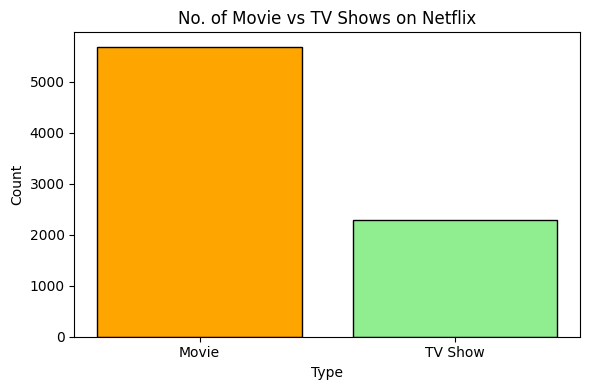

In [5]:
# Clean Data

df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))

plt.bar(type_counts.index, type_counts.values, color=['orange','lightgreen'], edgecolor='black')

plt.title('No. of Movie vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png', dpi=300, bbox_inches='tight')
plt.show()

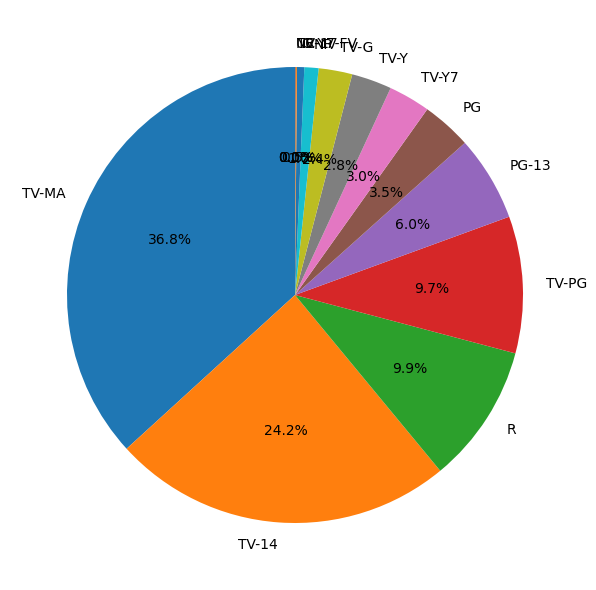

In [10]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.savefig('content_rating_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()

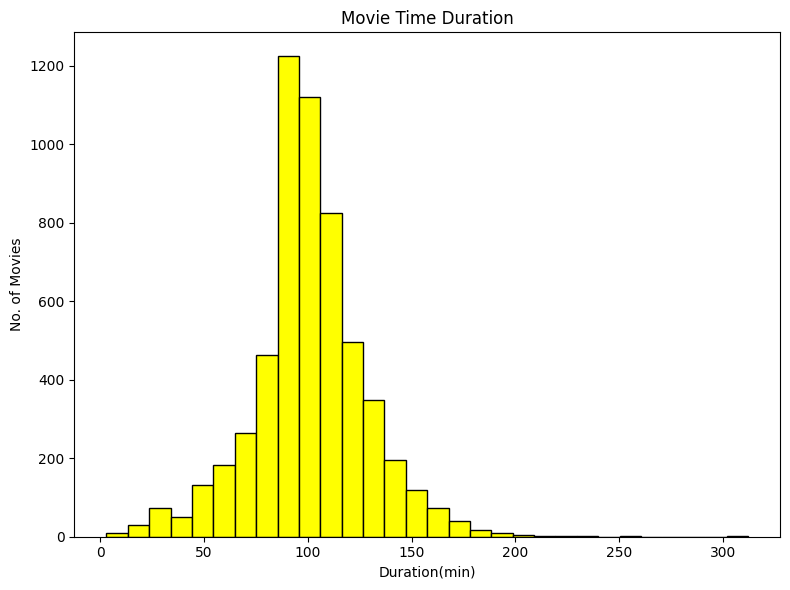

In [13]:
# Movie time duration

movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='yellow', edgecolor='black')

plt.title('Movie Time Duration')
plt.xlabel('Duration(min)')
plt.ylabel('No. of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png', dpi=30)
plt.show()

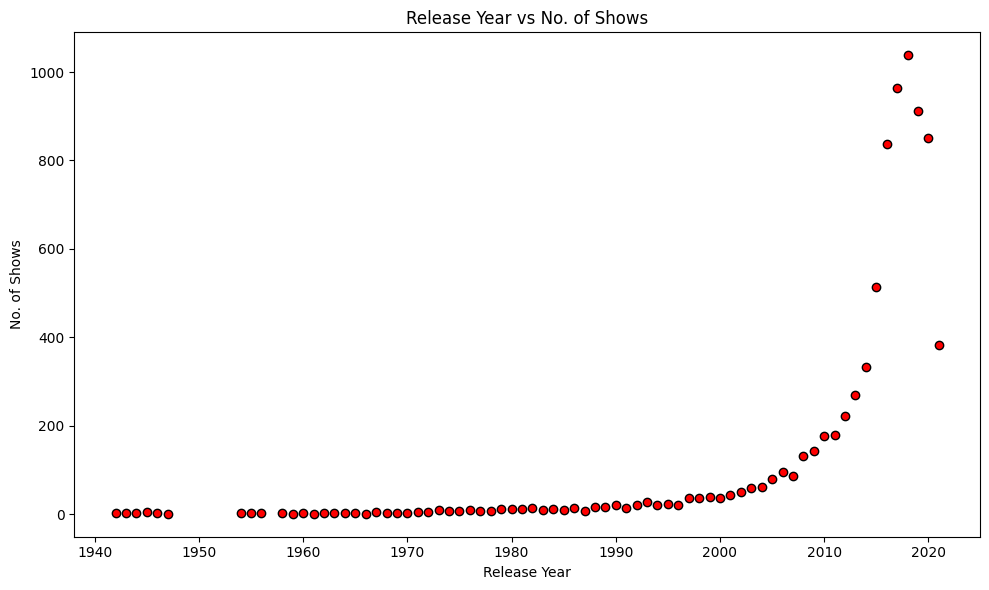

In [15]:
# Release Year vs No. of Shows

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))

plt.scatter(release_counts.index, release_counts.values, color='red', edgecolor='black')

plt.title('Release Year vs No. of Shows')
plt.xlabel('Release Year')
plt.ylabel('No. of Shows')
plt.tight_layout()
plt.savefig('Movie_release_in_different_year.png', dpi=300, bbox_inches='tight')
plt.show()

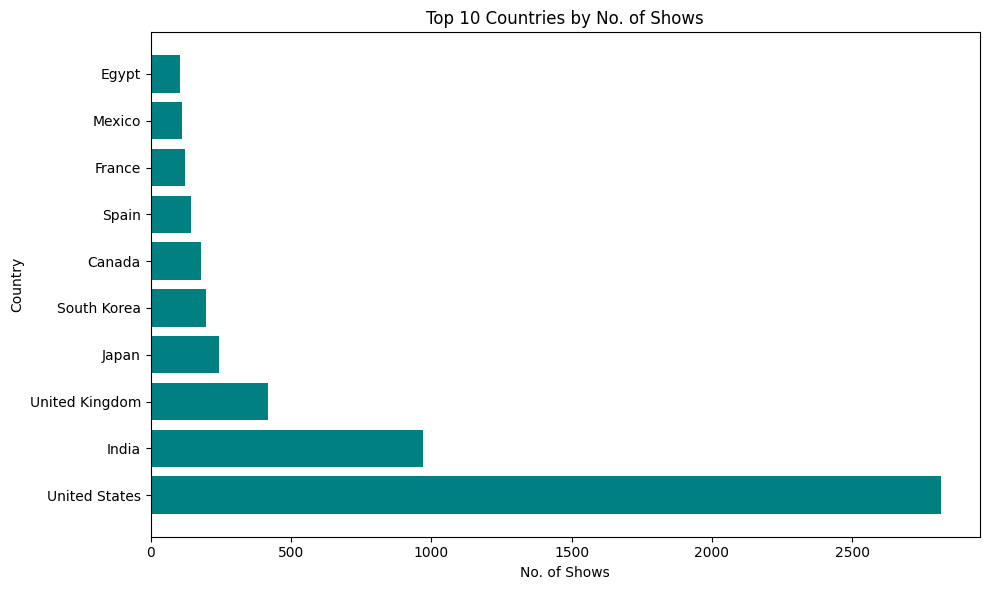

In [20]:
# Top 10 country with max no. of shows

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))

plt.barh(country_counts.index, country_counts.values,color='teal')
plt.title('Top 10 Countries by No. of Shows')
plt.xlabel('No. of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top_10_countries_by_show.png', dpi=300)
plt.show()


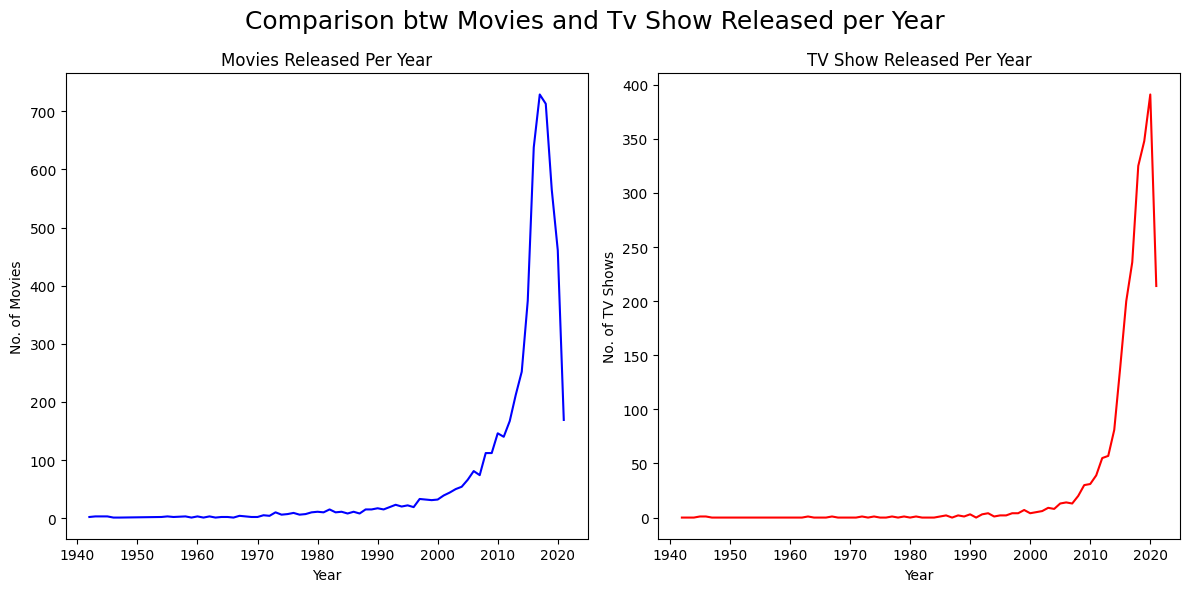

In [28]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,6))

#1st Subplot
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No. of Movies')

#2nd Subplot
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='red')
ax[1].set_title('TV Show Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('No. of TV Shows')

fig.suptitle('Comparison btw Movies and Tv Show Released per Year', fontsize=18)
plt.tight_layout()
plt.savefig('Movie_TVShows_Comparision', dpi=300)
plt.show()
